In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ITSalariesPart4.csv to ITSalariesPart4 (3).csv


In [ ]:
df = pd.read_csv('ITSalariesPart4.csv')
df.head()

,Unnamed: 0,TotalYearsExperience,YearsExperienceGermany,MainSkill,SecondarySkills,BrutSalary,BrutSalaryAndStocks,AnnualBrutLastYear,AnnualBrutAndStocksLastYear,VacationDays,...,HoursIfShorterWeek,AdditionalMonetarySupport,SeniorityLevel,EmploymentType,Female,Male,Type_Temporary contract,Type_Unlimited contract,LossOfJobCorona_No,LossOfJobCorona_Yes
0,0,5.0,3.0,76840.582037,72892.687548,80000.0,5000.0,75000.0,10000.0,30.0,...,13.566568,250.0,3,4,0,1,0,1,1,0
1,1,7.0,4.0,70149.999992,65895.882353,80000.0,5000.0,82000.0,5000.0,28.0,...,13.566568,250.0,3,4,0,1,0,1,1,0
2,2,4.0,1.0,65788.666667,65895.882353,54000.0,5000.0,65000.0,5000.0,24.0,...,13.566568,250.0,1,4,0,1,0,1,1,0
3,3,17.0,6.0,69636.731123,69636.731123,62000.0,5000.0,62000.0,5000.0,29.0,...,13.566568,250.0,3,4,0,1,0,1,1,0
4,4,5.0,1.0,69636.731123,70250.296314,76000.0,5000.0,76000.0,5000.0,30.0,...,13.566568,250.0,3,4,0,1,0,1,1,0


In [ ]:
# Seems like the index got messed up when we exported our dataframe
df = df.reset_index(drop=True)
df = df.iloc[: , 1:]

In [ ]:
to_scale_down = list(df[df.columns[(df>100).any()]].columns)
to_scale_down

['MainSkill',
 'SecondarySkills',
 'BrutSalary',
 'BrutSalaryAndStocks',
 'AnnualBrutLastYear',
 'AnnualBrutAndStocksLastYear',
 'CompanySize',
 'CompanyType',
 'AdditionalMonetarySupport']

In [ ]:
not_to_be_scaled = list(df[df.columns[(df<100).any()]].columns)

In [ ]:
# Scaling our dataframe
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df[to_scale_down])
scaled_df = pd.DataFrame(d, columns= to_scale_down)
scaled_df.head()

,MainSkill,SecondarySkills,BrutSalary,BrutSalaryAndStocks,AnnualBrutLastYear,AnnualBrutAndStocksLastYear,CompanySize,CompanyType,AdditionalMonetarySupport
0,0.466574,0.624452,0.411197,0.05,0.357542,0.055556,0.414383,0.579016,0.25
1,0.359303,0.513961,0.411197,0.05,0.396648,0.027778,0.728970,0.579016,0.25
2,0.289376,0.513961,0.258108,0.05,0.301676,0.027778,0.414383,0.567454,0.25
3,0.351073,0.573035,0.305212,0.05,0.284916,0.027778,0.728970,0.579016,0.25
4,0.351073,0.582724,0.387645,0.05,0.363128,0.027778,0.479281,0.567454,0.25


In [ ]:
df[to_scale_down] = scaled_df

In [ ]:
df.head()

,TotalYearsExperience,YearsExperienceGermany,MainSkill,SecondarySkills,BrutSalary,BrutSalaryAndStocks,AnnualBrutLastYear,AnnualBrutAndStocksLastYear,VacationDays,CompanySize,...,HoursIfShorterWeek,AdditionalMonetarySupport,SeniorityLevel,EmploymentType,Female,Male,Type_Temporary contract,Type_Unlimited contract,LossOfJobCorona_No,LossOfJobCorona_Yes
0,5.0,3.0,0.466574,0.624452,0.411197,0.05,0.357542,0.055556,30.0,0.414383,...,13.566568,0.25,3,4,0,1,0,1,1,0
1,7.0,4.0,0.359303,0.513961,0.411197,0.05,0.396648,0.027778,28.0,0.728970,...,13.566568,0.25,3,4,0,1,0,1,1,0
2,4.0,1.0,0.289376,0.513961,0.258108,0.05,0.301676,0.027778,24.0,0.414383,...,13.566568,0.25,1,4,0,1,0,1,1,0
3,17.0,6.0,0.351073,0.573035,0.305212,0.05,0.284916,0.027778,29.0,0.728970,...,13.566568,0.25,3,4,0,1,0,1,1,0
4,5.0,1.0,0.351073,0.582724,0.387645,0.05,0.363128,0.027778,30.0,0.479281,...,13.566568,0.25,3,4,0,1,0,1,1,0


In [ ]:
df.shape

(1031, 21)

In [ ]:
print("There are {} men and {} women in our data.".format(df[df['Male'] == 1]['Male'].shape[0], df[df['Female'] == 1]['Female'].shape[0]))

There are 890 men and 141 women in our data.


In [ ]:
# Proceding with the deletion rate we found useful last time
ind = df[df['Male'] == 1].sample(500).index
df = df.drop(ind, axis = 0)
df = df.reset_index(drop=True)
df = df.iloc[: , 1:]

In [ ]:
print("There are {} men and {} women in our data.".format(df[df['Male'] == 1]['Male'].shape[0], df[df['Female'] == 1]['Female'].shape[0]))

There are 390 men and 141 women in our data.


In [ ]:
X = df.drop(['Male', 'Female'], axis = 1)
y = df['Male']

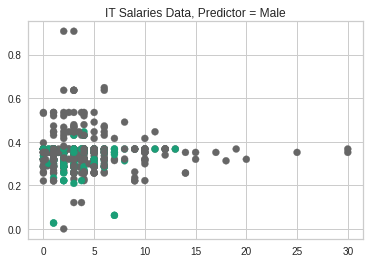

In [ ]:
plt.scatter(X.to_numpy()[:,0],X.to_numpy()[:,1],  c= df['Male'], cmap =  'Dark2')
plt.title("IT Salaries Data, Predictor = Male")
plt.show()

In [ ]:
df.shape

(531, 20)

In [ ]:
# Adding in the same function we used last time, but introducing 2 new models: Decision tree-Gini and Decision Tree- Entropy
# Cleaning it up for better use

def knn(X_train, X_test, y_train, y_test, printing):
  error = []
  fold = 1

  for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))
            
  plt.errorbar(y_test, y_pred, yerr=0.8, fmt='.k')
          
  if printing == 1:
    print("Minimum error:-",min(error),"at K =",error.index(min(error)))

  return y_pred

In [ ]:
def lda(X_train, X_test, y_train, y_test, printing):
  lda = LDA(n_components=1)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
          
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  plt.errorbar(y_test, y_pred, yerr=0.8, fmt='.k')

  return y_pred

In [ ]:
def reg(X_train, X_test, y_train, y_test, printing):
  logreg = LogisticRegression(solver='lbfgs', max_iter=100)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  plt.errorbar(y_test, y_pred, yerr=0.8, fmt='.k')
  return y_pred

In [ ]:
def gini(X_train, X_test, y_train, y_test, hyperparameters, printing):
  acc_score = []

  clf = DecisionTreeClassifier(criterion = "gini",random_state = hyperparameters[2], max_depth =hyperparameters[1] , min_samples_leaf = hyperparameters[0])
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_pred , y_test)
  acc_score.append(acc)

  importances = list(clf.feature_importances_)
  indices = np.argsort(importances)[::-1]
  feature_names = list(X_train.columns)

  imp = pd.DataFrame(zip(feature_names,importances), columns =['Feature', 'Relevance'])
  imp = imp.sort_values(by=['Relevance'], ascending=False)

  p = sns.set_color_codes("muted")
  p = sns.barplot(x='Relevance', y='Feature', data=imp, color="g")

  return  y_pred, imp

In [ ]:
def entropy(X_train, X_test, y_train, y_test, hyperparameters,printing):
  acc_score = []

  clf = DecisionTreeClassifier(criterion = "entropy",  max_depth =hyperparameters[0] , min_samples_leaf = hyperparameters[1], random_state = hyperparameters[2])
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_pred, y_test)
  acc_score.append(acc)

  importances = list(clf.feature_importances_)
  indices = np.argsort(importances)[::-1]
  feature_names = list(X_train.columns)

  imp = pd.DataFrame(zip(feature_names,importances), columns =['Feature', 'Relevance'])
  imp = imp.sort_values(by=['Relevance'], ascending=False)

  p = sns.set_color_codes("muted")
  p = sns.barplot(x='Relevance', y='Feature', data=imp, color="g")

  return y_pred, imp

In [ ]:
def naive_bayes(X_train, X_test, y_train, y_test, printing):
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred  =  classifier.predict(X_test)
  return y_pred

In [ ]:
def plot_cm(cm, model):
  ax = sns.heatmap(cm/np.sum(cm), annot=True,  cmap="Greens")
  ax.set_title('Confusion Matrix Male Label\n\n' + model);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
def model(X, y, n_splits, model, hyperparameters, printing):
  k_folds = KFold(n_splits = n_splits)
  acc_score = []
  cm = 0
  imp = 0

  for train_index , test_index in k_folds.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y[train_index] , y[test_index]

      if model == "knn":
        y_pred = knn(X_train, X_test, y_train, y_test, printing)
          
      elif model == 'lda':
       y_pred = lda(X_train, X_test, y_train, y_test, printing)

      elif model == 'reg':
       y_pred =  reg(X_train, X_test, y_train, y_test, printing)

      elif model == 'gini':
       y_pred , imp=  gini(X_train, X_test, y_train, y_test, hyperparameters, printing)

      elif model == 'entropy':
        y_pred, imp = entropy(X_train, X_test, y_train, y_test, hyperparameters, printing)

      elif model == 'bayes':
         y_pred =  naive_bayes(X_train, X_test, y_train, y_test, printing)
        
      acc = accuracy_score(y_pred , y_test)
      acc_score.append(acc)
     
  avg_acc_score = sum(acc_score)/n_splits
  cm = confusion_matrix(y_test, y_pred)

  if printing == 1:
    report = metrics.classification_report(y_test, y_pred )
    print("Model:", model)
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print(metrics.classification_report(y_test, y_pred ))
    return cm, imp

  else:
    report = metrics.classification_report(y_test, y_pred )
    return avg_acc_score, report, cm, imp


Minimum error:- 0.27102803738317754 at K = 2
Minimum error:- 0.2641509433962264 at K = 6
Minimum error:- 0.29245283018867924 at K = 8
Minimum error:- 0.2830188679245283 at K = 8
Minimum error:- 0.36792452830188677 at K = 8
Model: knn
accuracy of each fold - [0.719626168224299, 0.7264150943396226, 0.7075471698113207, 0.7169811320754716, 0.6320754716981132]
Avg accuracy : 0.7005290072297654
              precision    recall  f1-score   support

           0       0.15      0.07      0.09        30
           1       0.70      0.86      0.77        76

    accuracy                           0.63       106
   macro avg       0.43      0.46      0.43       106
weighted avg       0.54      0.63      0.58       106



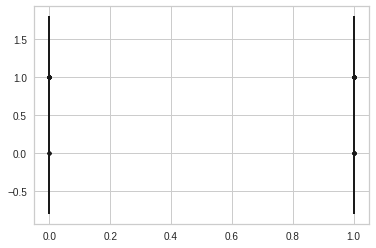

In [ ]:
cm_knn, dummy = model(X,y, 5, 'knn', [], 1)

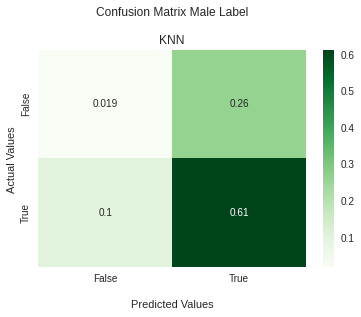

In [ ]:
plot_cm(cm_knn, "KNN")

Model: lda
accuracy of each fold - [0.719626168224299, 0.6981132075471698, 0.7169811320754716, 0.7358490566037735, 0.7169811320754716]
Avg accuracy : 0.7175101393052371
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        30
           1       0.74      0.93      0.83        76

    accuracy                           0.72       106
   macro avg       0.62      0.55      0.54       106
weighted avg       0.67      0.72      0.66       106



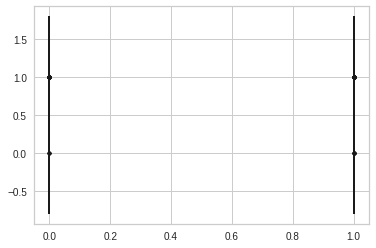

In [ ]:
cm_lda, dummy = model(X,y, 5, 'lda', [], 1)

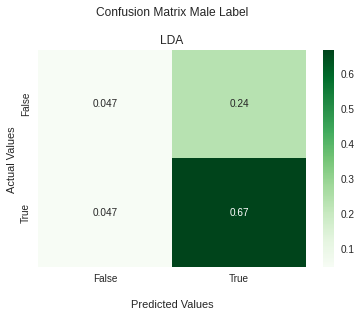

In [ ]:
plot_cm(cm_lda, "LDA")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: reg
accuracy of each fold - [0.7009345794392523, 0.7264150943396226, 0.7358490566037735, 0.7547169811320755, 0.7169811320754716]
Avg accuracy : 0.7269793687180391
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        30
           1       0.73      0.95      0.83        76

    accuracy                           0.72       106
   macro avg       0.62      0.54      0.52       106
weighted avg       0.67      0.72      0.65       106



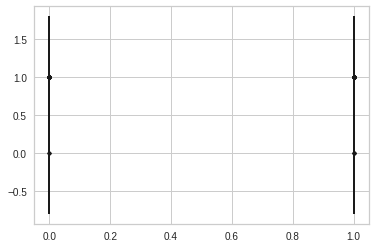

In [ ]:
cm_reg, dummy = model(X,y, 5, 'reg', [], 1)

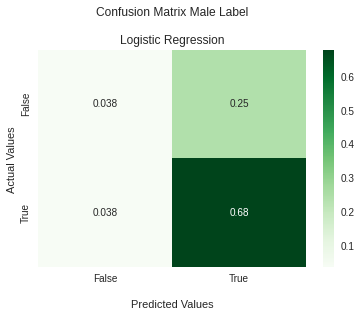

In [ ]:
plot_cm(cm_reg, "Logistic Regression")

In [ ]:
# Starting with arbitrary hyperparameters
# max_depth, min_samples, leaf
hyperparameters = [5, 50, 5]

Model: gini
accuracy of each fold - [0.7009345794392523, 0.6698113207547169, 0.7264150943396226, 0.6226415094339622, 0.6792452830188679]
Avg accuracy : 0.6798095573972844
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        30
           1       0.77      0.79      0.78        76

    accuracy                           0.68       106
   macro avg       0.60      0.59      0.60       106
weighted avg       0.67      0.68      0.68       106



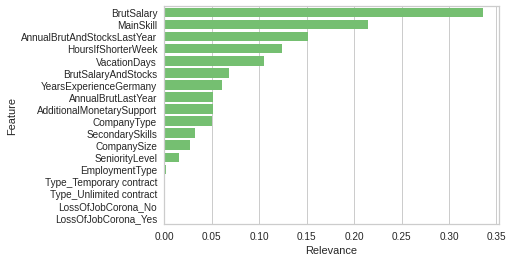

In [ ]:
cm_gini, imp_gini = model(X, y, 5, 'gini', hyperparameters, 1)

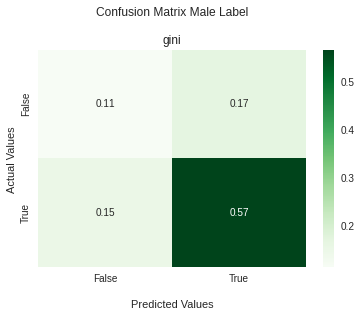

In [ ]:
plot_cm(cm_gini, "gini")

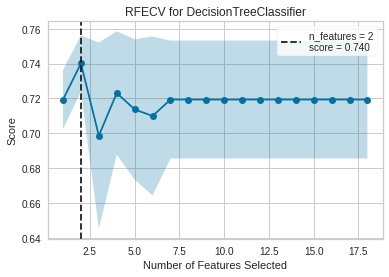

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

clf = DecisionTreeClassifier(criterion = "gini",  splitter = "best", max_depth = 5 , min_samples_split = 50, min_samples_leaf = 5 , random_state = 50)
cv = StratifiedKFold(5)
visualizer = RFECV(clf, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

Model: entropy
accuracy of each fold - [0.7383177570093458, 0.7264150943396226, 0.6792452830188679, 0.7358490566037735, 0.7075471698113207]
Avg accuracy : 0.717474872156586
              precision    recall  f1-score   support

           0       0.47      0.30      0.37        30
           1       0.76      0.87      0.81        76

    accuracy                           0.71       106
   macro avg       0.62      0.58      0.59       106
weighted avg       0.68      0.71      0.68       106



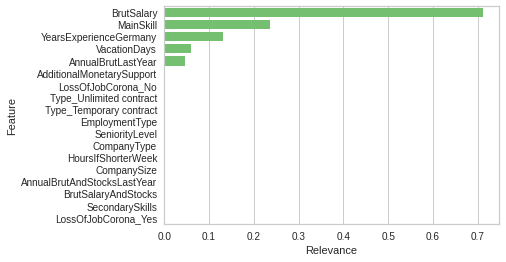

In [ ]:
cm_entropy, imp_entropy = model(X, y, 5, 'entropy', hyperparameters, 1)

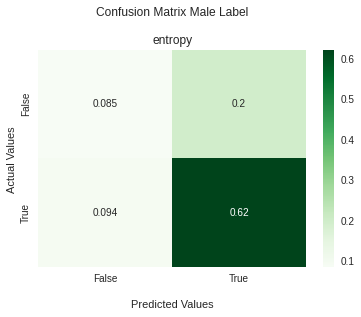

In [ ]:
plot_cm(cm_entropy, "entropy")

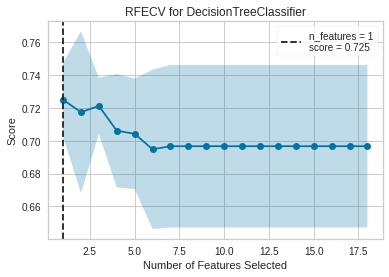

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy",  splitter = "best", max_depth = 5 , min_samples_split = 50, min_samples_leaf = 5 , random_state = 50)
cv = StratifiedKFold(5)
visualizer = RFECV(clf, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "precision")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='precision', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006188,0.001846,0.003887,0.000413,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771429,0.777778,0.809524,0.815385,0.833333,0.801490,0.023399,13
1,0.005729,0.001630,0.003966,0.000230,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771429,0.777778,0.809524,0.815385,0.833333,0.801490,0.023399,13
2,0.005652,0.001597,0.003799,0.000168,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771429,0.777778,0.809524,0.815385,0.833333,0.801490,0.023399,13
3,0.005689,0.002454,0.003739,0.000076,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.790323,0.792453,0.793103,0.743243,0.830189,0.789862,0.027630,32
4,0.004354,0.000293,0.003808,0.000176,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.733333,0.743243,0.743243,0.743243,0.743243,0.741261,0.003964,41


In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [ ]:
grid_search.best_score_

0.8209274821039527

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Model: entropy
accuracy of each fold - [0.7009345794392523, 0.7547169811320755, 0.7547169811320755, 0.7452830188679245, 0.7169811320754716]
Avg accuracy : 0.7345265385293598
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.72      1.00      0.84        76

    accuracy                           0.72       106
   macro avg       0.36      0.50      0.42       106
weighted avg       0.51      0.72      0.60       106



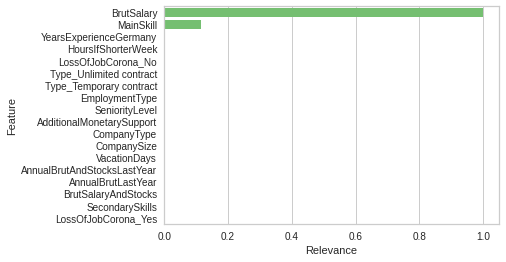

In [ ]:
cm_entropy = model(X, y, 5, 'entropy', [5,100,5], 1)

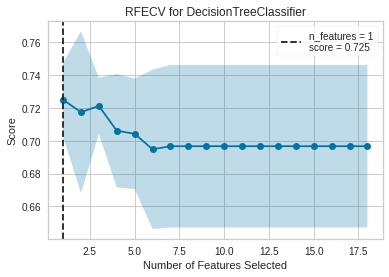

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

clf = DecisionTreeClassifier(criterion = "entropy",  splitter = "best", max_depth = 5 , min_samples_split = 50, min_samples_leaf = 5 , random_state = 50)
cv = StratifiedKFold(5)
visualizer = RFECV(clf, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

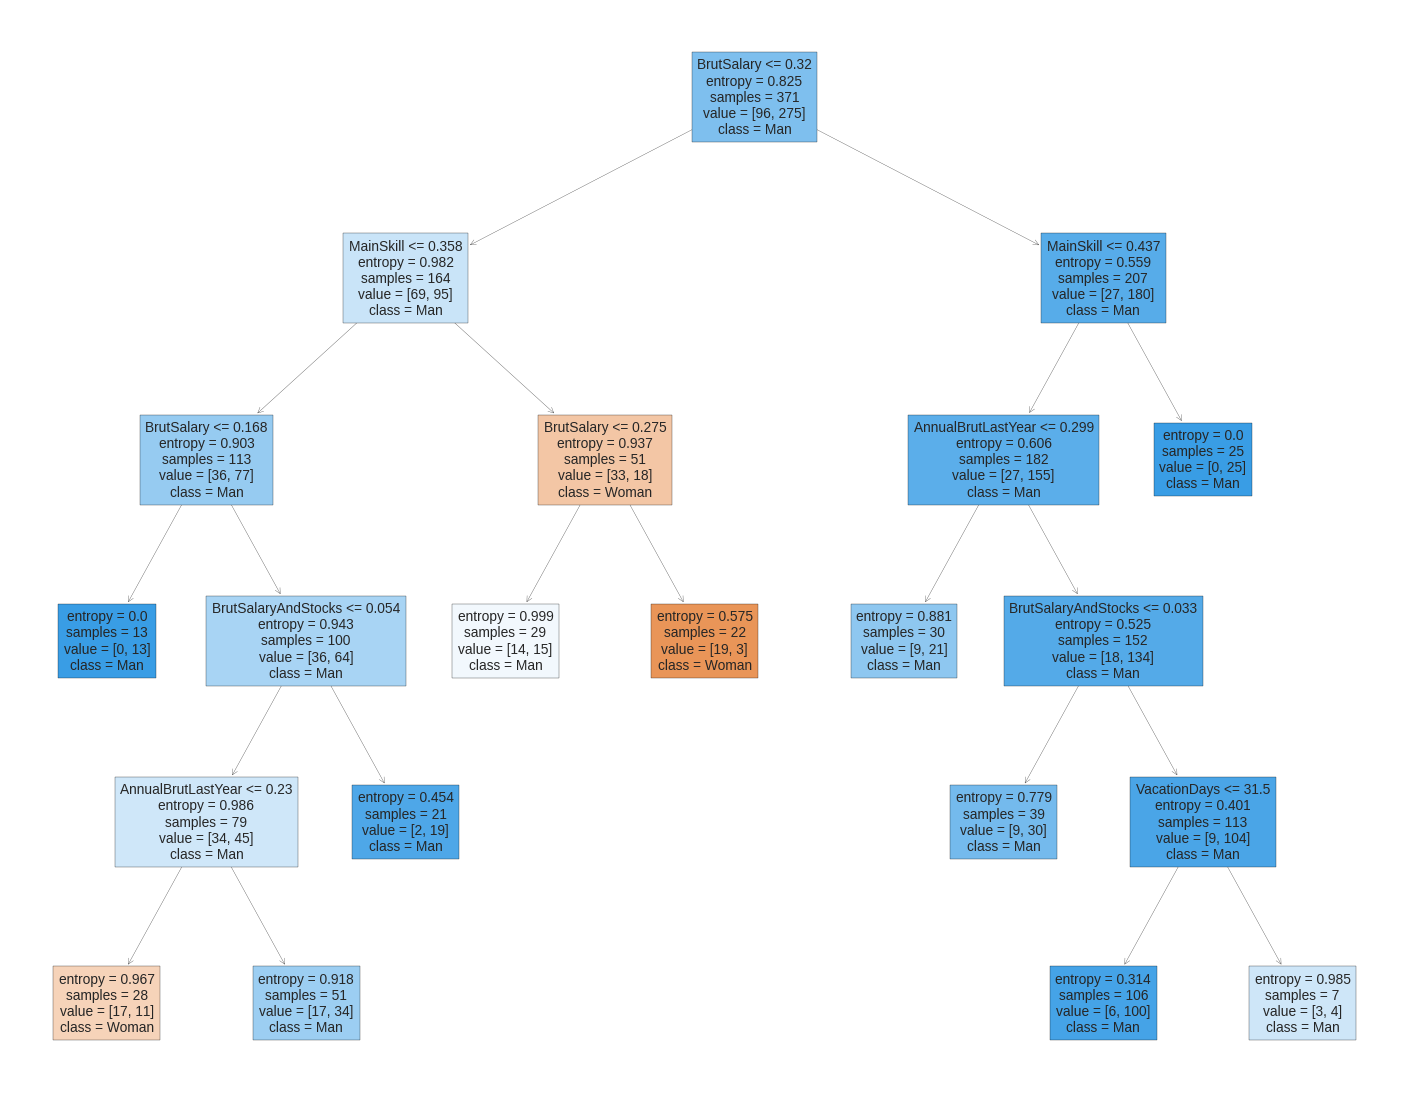

In [ ]:
dt =  DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 5 , min_samples_split = 50, min_samples_leaf = 5)
dt.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Woman', 'Man'],
                   filled=True)

## Using Best Attributes

In [ ]:
best_features_gini = list(imp_gini.head()['Feature'])
best_features_entropy = list(imp_entropy.head()['Feature'])

best_features = list(set(best_features_entropy + best_features_gini))
best_features

['AnnualBrutLastYear',
 'HoursIfShorterWeek',
 'MainSkill',
 'VacationDays',
 'AnnualBrutAndStocksLastYear',
 'BrutSalary',
 'YearsExperienceGermany']

In [ ]:
cols_to_delete = [x for x in list(X.columns) if x not in best_features ]

In [ ]:
X = X.drop(cols_to_delete, axis = 1)
y = df['Male']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
dt = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}

In [ ]:
hyperparameters = [3,100,5]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Model: entropy
accuracy of each fold - [0.7009345794392523, 0.7547169811320755, 0.7547169811320755, 0.7452830188679245, 0.7169811320754716]
Avg accuracy : 0.7345265385293598
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.72      1.00      0.84        76

    accuracy                           0.72       106
   macro avg       0.36      0.50      0.42       106
weighted avg       0.51      0.72      0.60       106



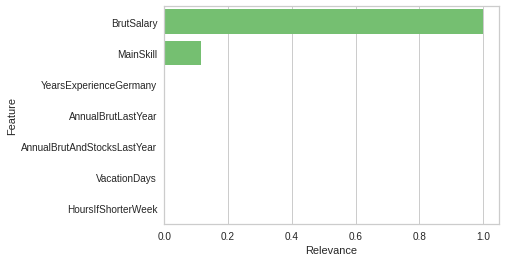

In [ ]:
cm_gini_improved, imp_gini_improved = model(X, y, 5, 'entropy', hyperparameters, 1)

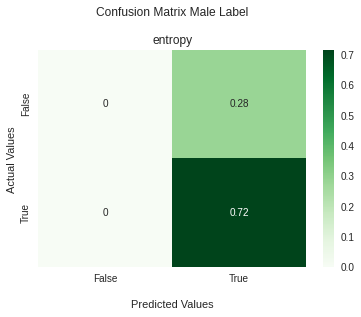

In [ ]:
plot_cm(cm_gini_improved, "entropy")

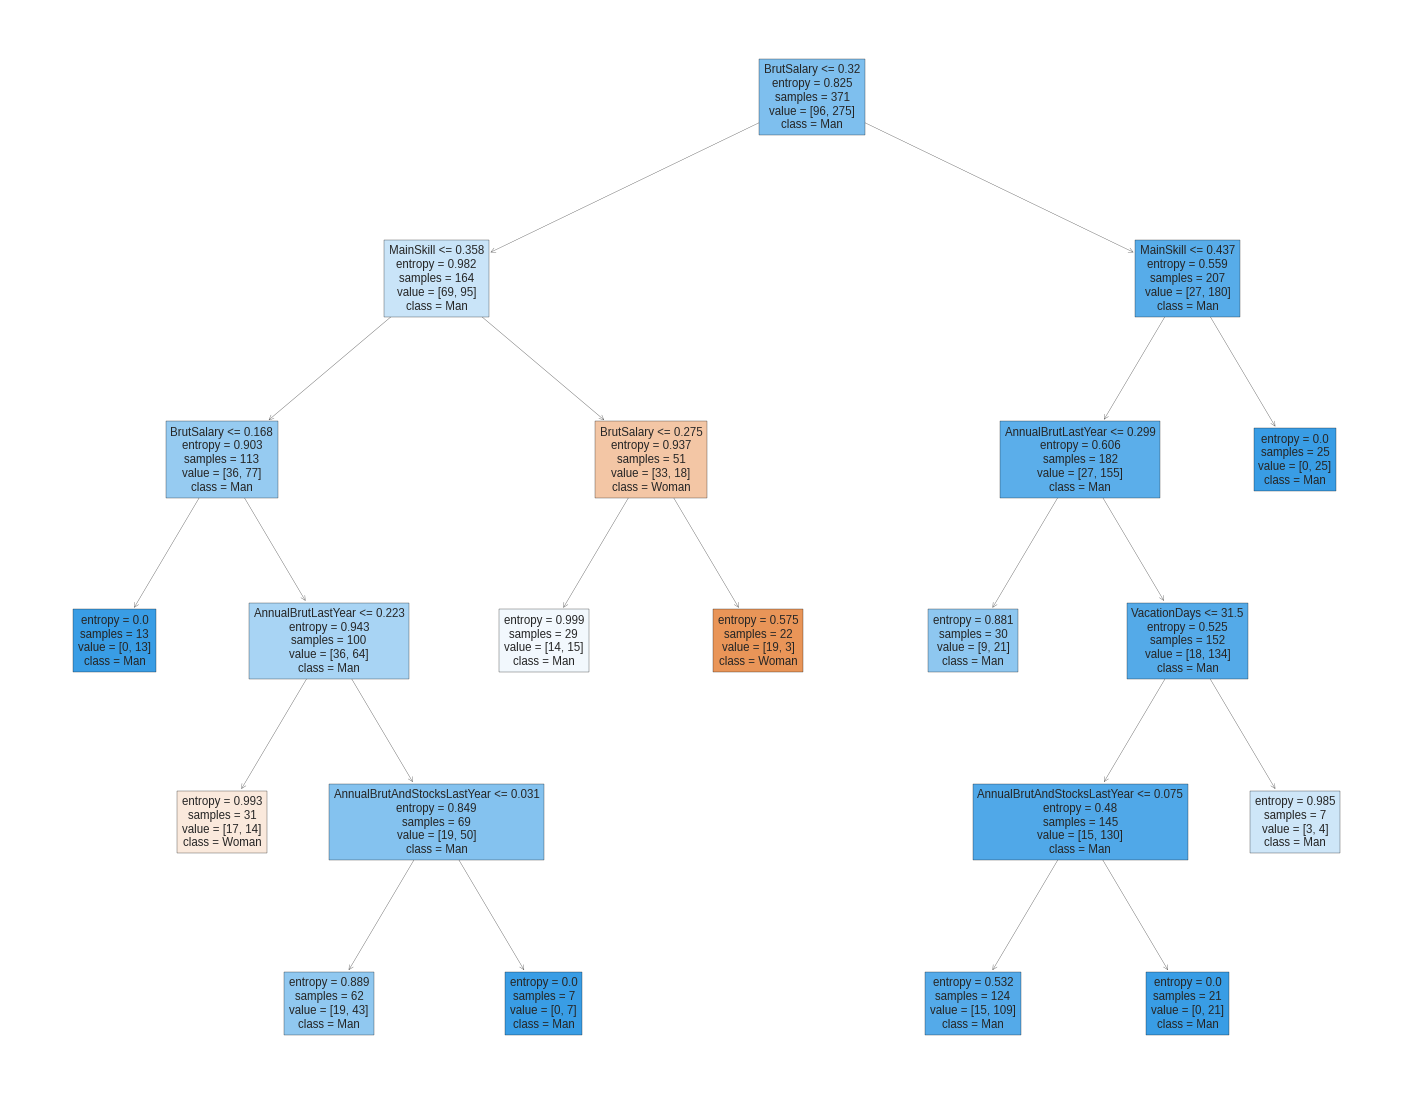

In [ ]:
dt =  DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 5 , min_samples_split = 50, min_samples_leaf = 5)
dt.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Woman', 'Man'],
                   filled=True)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
cm_bayes = model(X, y, 5, 'bayes', [], 1)

Model: bayes
accuracy of each fold - [0.5607476635514018, 0.6509433962264151, 0.5943396226415094, 0.6037735849056604, 0.6226415094339622]
Avg accuracy : 0.6064891553517898
              precision    recall  f1-score   support

           0       0.41      0.73      0.52        30
           1       0.85      0.58      0.69        76

    accuracy                           0.62       106
   macro avg       0.63      0.66      0.61       106
weighted avg       0.72      0.62      0.64       106



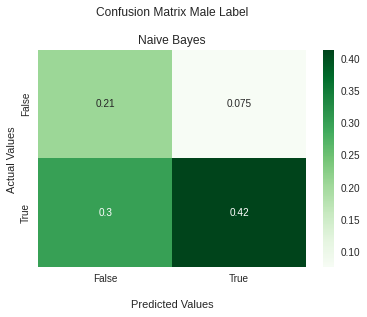

In [ ]:
plot_cm(cm_bayes[0], "Naive Bayes")

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Gaussian
test_sizes = np.arange(0.1, 0.6, 0.05).tolist()
test_sizes = [round(item, 2) for item in test_sizes]
train_sizes = [1 - x for x in test_sizes]
training_scores = []
testing_scores = []
acc_score = []


for i in range (0, len(test_sizes)):
  ss = ShuffleSplit(n_splits=5, train_size= train_sizes[i], test_size= test_sizes[i])
  
  
  for train_index, test_index in ss.split(X):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred  =  classifier.predict(X_test)
    acc = accuracy_score(y_pred , y_test)
    acc_score.append(acc)
      
  avg_acc_score = sum(acc_score)/5
  cm = confusion_matrix(y_test, y_pred)
  report = metrics.classification_report(y_test, y_pred )
  training_scores.append(classifier.score(X_train, y_train))
  testing_scores.append(classifier.score(X_test, y_test))

In [ ]:
import statistics

In [ ]:
# Training score mean
statistics.mean(training_scores)

0.6228325745666561

In [ ]:
#Testing score mean
statistics.mean(testing_scores)

0.5906850990611457

In [ ]:
testing_scores = [round(item, 2) for item in testing_scores]
testing_scores

[0.61, 0.57, 0.64, 0.62, 0.52, 0.62, 0.56, 0.64, 0.53, 0.57]

In [ ]:
training_scores = [round(item, 2) for item in training_scores]
training_scores 

[0.6, 0.59, 0.63, 0.61, 0.62, 0.64, 0.61, 0.66, 0.64, 0.62]

(0.65, 0.672)

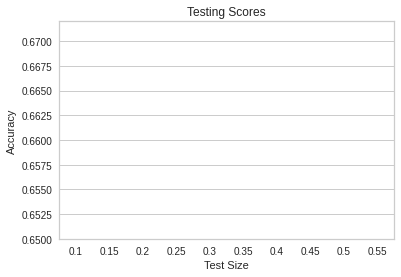

In [ ]:
p = sns.barplot(x= test_sizes, y= testing_scores, color="g")
plt.ylabel("Accuracy")
plt.xlabel("Test Size")
plt.title("Testing Scores")
plt.ylim(0.65)

(0.65, 0.6930000000000001)

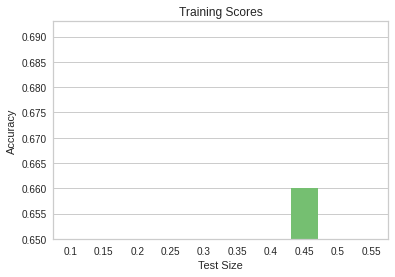

In [ ]:
p = sns.barplot(x= test_sizes, y= training_scores, color="g")
plt.ylabel("Accuracy")
plt.xlabel("Test Size")
plt.title("Training Scores")
plt.ylim(0.65)

In [ ]:
ss = ShuffleSplit(n_splits=5, train_size= 0.45, test_size= 0.55)  
for train_index, test_index in ss.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred  =  classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred )

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.39      0.48      0.43        85
           1       0.77      0.70      0.73       208

    accuracy                           0.63       293
   macro avg       0.58      0.59      0.58       293
weighted avg       0.66      0.63      0.64       293



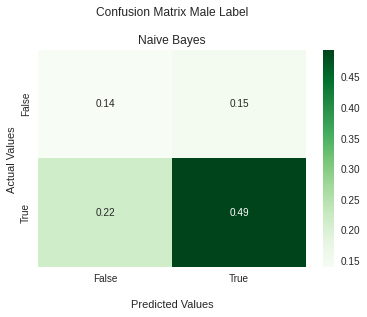

In [ ]:
plot_cm(cm, "Naive Bayes")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarni

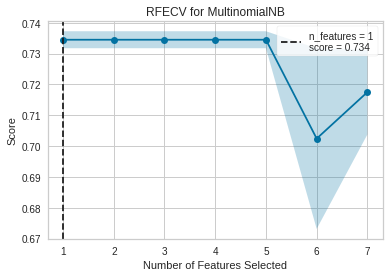

In [ ]:
classifier = MultinomialNB()
cv = StratifiedKFold(5)
visualizer = RFECV(classifier, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

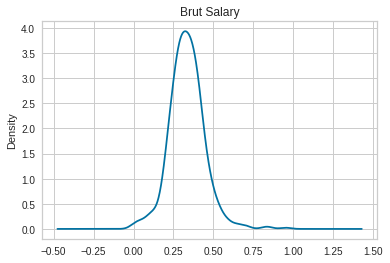

In [ ]:
df['BrutSalary'].plot(kind='kde', title = 'Brut Salary')

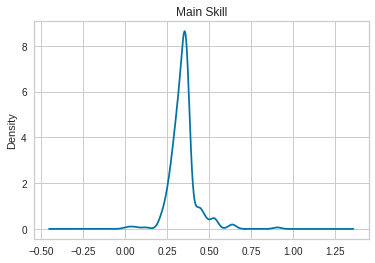

In [ ]:
df['MainSkill'].plot(kind='kde', title = 'Main Skill')

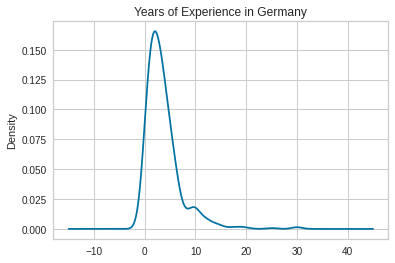

In [ ]:
df['YearsExperienceGermany'].plot(kind='kde', title = 'Years of Experience in Germany')

### Hypothesis tests

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [ ]:
df.head()

,YearsExperienceGermany,MainSkill,SecondarySkills,BrutSalary,BrutSalaryAndStocks,AnnualBrutLastYear,AnnualBrutAndStocksLastYear,VacationDays,CompanySize,CompanyType,HoursIfShorterWeek,AdditionalMonetarySupport,SeniorityLevel,EmploymentType,Female,Male,Type_Temporary contract,Type_Unlimited contract,LossOfJobCorona_No,LossOfJobCorona_Yes
0,3.0,0.466574,0.624452,0.411197,0.05,0.357542,0.055556,30.0,0.414383,0.579016,13.566568,0.25,3,4,0,1,0,1,1,0
1,4.0,0.359303,0.513961,0.411197,0.05,0.396648,0.027778,28.0,0.728970,0.579016,13.566568,0.25,3,4,0,1,0,1,1,0
2,1.0,0.289376,0.513961,0.258108,0.05,0.301676,0.027778,24.0,0.414383,0.567454,13.566568,0.25,1,4,0,1,0,1,1,0
3,6.0,0.351073,0.573035,0.305212,0.05,0.284916,0.027778,29.0,0.728970,0.579016,13.566568,0.25,3,4,0,1,0,1,1,0
4,1.0,0.351073,0.582724,0.387645,0.05,0.363128,0.027778,30.0,0.479281,0.567454,13.566568,0.25,3,4,0,1,0,1,1,0


In [ ]:
stats.ttest_ind(a= df[df['Male'] == 1]['BrutSalary'],
                b= df[df['Male'] == 0]['BrutSalary'],
                equal_var= False)  

Ttest_indResult(statistic=6.253224319392406, pvalue=1.1435420114825443e-09)

In [ ]:
stats.ttest_ind(a= df[df['Male'] == 1]['YearsExperienceGermany'],
                b= df[df['Male'] == 0]['YearsExperienceGermany'],
                equal_var= False)  

Ttest_indResult(statistic=3.0154530029985858, pvalue=0.002729741819782337)

In [ ]:
stats.ttest_ind(a= df[df['Male'] == 1]['SeniorityLevel'],
                b= df[df['Male'] == 0]['SeniorityLevel'],
                equal_var= False)  

Ttest_indResult(statistic=3.650124388446461, pvalue=0.00032461176040412366)

In [ ]:
stats.ttest_ind(a= df[df['Male'] == 1]['LossOfJobCorona_Yes'],
                b= df[df['Male'] == 0]['LossOfJobCorona_Yes'],
                equal_var= False)  

Ttest_indResult(statistic=-0.4754897261291718, pvalue=0.6348932324763414)

In [ ]:
stat, pvalue = stats.ttest_ind(a= df[df['Male'] == 1],
                b= df[df['Male'] == 0],
                equal_var= False)  

In [ ]:
pvalue = [round(item, 4) for item in pvalue]
pvalue

[0.0027,
 0.0003,
 0.0643,
 0.0,
 0.0016,
 0.0,
 0.0123,
 0.7637,
 0.0557,
 0.7084,
 0.7143,
 0.7914,
 0.0003,
 0.1502,
 0.0,
 0.0,
 0.3133,
 0.4111,
 0.487,
 0.6349]

In [ ]:
cols = df.columns

In [ ]:
hypothesis =  pd.DataFrame(list(zip(cols, pvalue)),
               columns =['Feature', 'p-value'])

hypothesis = hypothesis.drop(hypothesis[hypothesis['Feature'] == 'Male'].index, axis = 0)
hypothesis = hypothesis.drop(hypothesis[hypothesis['Feature'] == 'Female'].index, axis = 0)
hypothesis.reset_index(drop=True)

,Feature,p-value
0,YearsExperienceGermany,0.0027
1,MainSkill,0.0003
2,SecondarySkills,0.0643
3,BrutSalary,0.0000
4,BrutSalaryAndStocks,0.0016
5,AnnualBrutLastYear,0.0000
6,AnnualBrutAndStocksLastYear,0.0123
7,VacationDays,0.7637
8,CompanySize,0.0557
9,CompanyType,0.7084


In [ ]:
hypothesis.sort_values('p-value')

,Feature,p-value
3,BrutSalary,0.0000
5,AnnualBrutLastYear,0.0000
1,MainSkill,0.0003
12,SeniorityLevel,0.0003
4,BrutSalaryAndStocks,0.0016
0,YearsExperienceGermany,0.0027
6,AnnualBrutAndStocksLastYear,0.0123
8,CompanySize,0.0557
2,SecondarySkills,0.0643
13,EmploymentType,0.1502
